In [1]:
#Libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import sklearn 
from matplotlib import pyplot

%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv("task_data.csv")

In [3]:
df.shape

(400, 12)

In [4]:
df.head()

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,sample0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,sample1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,sample2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,sample3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,sample4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


In [5]:
df.tail()

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
395,sample395,-1.0,0.433150,0.816109,0.452945,0.065469,0.237093,0.719321,0.577969,0.085598,0.357115,0.070060
396,sample396,-1.0,0.339346,0.914610,0.097827,0.077522,0.484140,0.690568,0.420054,0.482845,0.395148,0.438641
397,sample397,-1.0,0.320118,0.444951,0.401896,0.970993,0.960264,0.138345,0.354927,0.230749,0.204612,0.558889
398,sample398,-1.0,0.059132,0.337426,0.772847,0.099038,0.966042,0.975086,0.532891,0.035839,0.258723,0.709958
399,sample399,-1.0,0.379778,0.460256,0.229257,0.768975,0.321882,0.118572,0.448964,0.546324,0.363127,0.176632


In [6]:
#Convert class_lable to binary values
label = {-1.0: 0, 1.0: 1}
df['class_label'] = df['class_label'].map(label)

In [7]:
# Check label count
len(df[df["class_label"] == 1])

200

In [8]:
# Check class label count
len(df[df["class_label"] == -1.0]), len(df[df["class_label"] == 1.0])

(0, 200)

In [9]:
df.columns

Index(['sample index', 'class_label', 'sensor0', 'sensor1', 'sensor2',
       'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8',
       'sensor9'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sample index  400 non-null    object 
 1   class_label   400 non-null    int64  
 2   sensor0       400 non-null    float64
 3   sensor1       400 non-null    float64
 4   sensor2       400 non-null    float64
 5   sensor3       400 non-null    float64
 6   sensor4       400 non-null    float64
 7   sensor5       400 non-null    float64
 8   sensor6       400 non-null    float64
 9   sensor7       400 non-null    float64
 10  sensor8       400 non-null    float64
 11  sensor9       400 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 37.6+ KB


In [11]:
df.dtypes

sample index     object
class_label       int64
sensor0         float64
sensor1         float64
sensor2         float64
sensor3         float64
sensor4         float64
sensor5         float64
sensor6         float64
sensor7         float64
sensor8         float64
sensor9         float64
dtype: object

In [12]:
#Check for NAN entries
np.where(np.isnan(df.drop(["sample index"], axis=1)))

(array([], dtype=int64), array([], dtype=int64))

In [13]:
#Fill NAN if they exist
df.fillna(df.median(), inplace=True)

In [14]:
df.describe()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.500000,0.523661,0.509223,0.481238,0.509752,0.497875,0.501065,0.490480,0.482372,0.482822,0.541933
std,0.500626,0.268194,0.276878,0.287584,0.297712,0.288208,0.287634,0.289954,0.282714,0.296180,0.272490
min,0.000000,0.007775,0.003865,0.004473,0.001466,0.000250,0.000425,0.000173,0.003322,0.003165,0.000452
25%,0.000000,0.299792,0.283004,0.235544,0.262697,0.249369,0.269430,0.226687,0.242848,0.213626,0.321264
50%,0.500000,0.534906,0.507583,0.460241,0.510066,0.497842,0.497108,0.477341,0.463438,0.462251,0.578389
75%,1.000000,0.751887,0.727843,0.734937,0.768975,0.743401,0.738854,0.735304,0.732483,0.740542,0.768990
max,1.000000,0.999476,0.998680,0.992963,0.995119,0.999412,0.997367,0.997141,0.998230,0.996098,0.999465


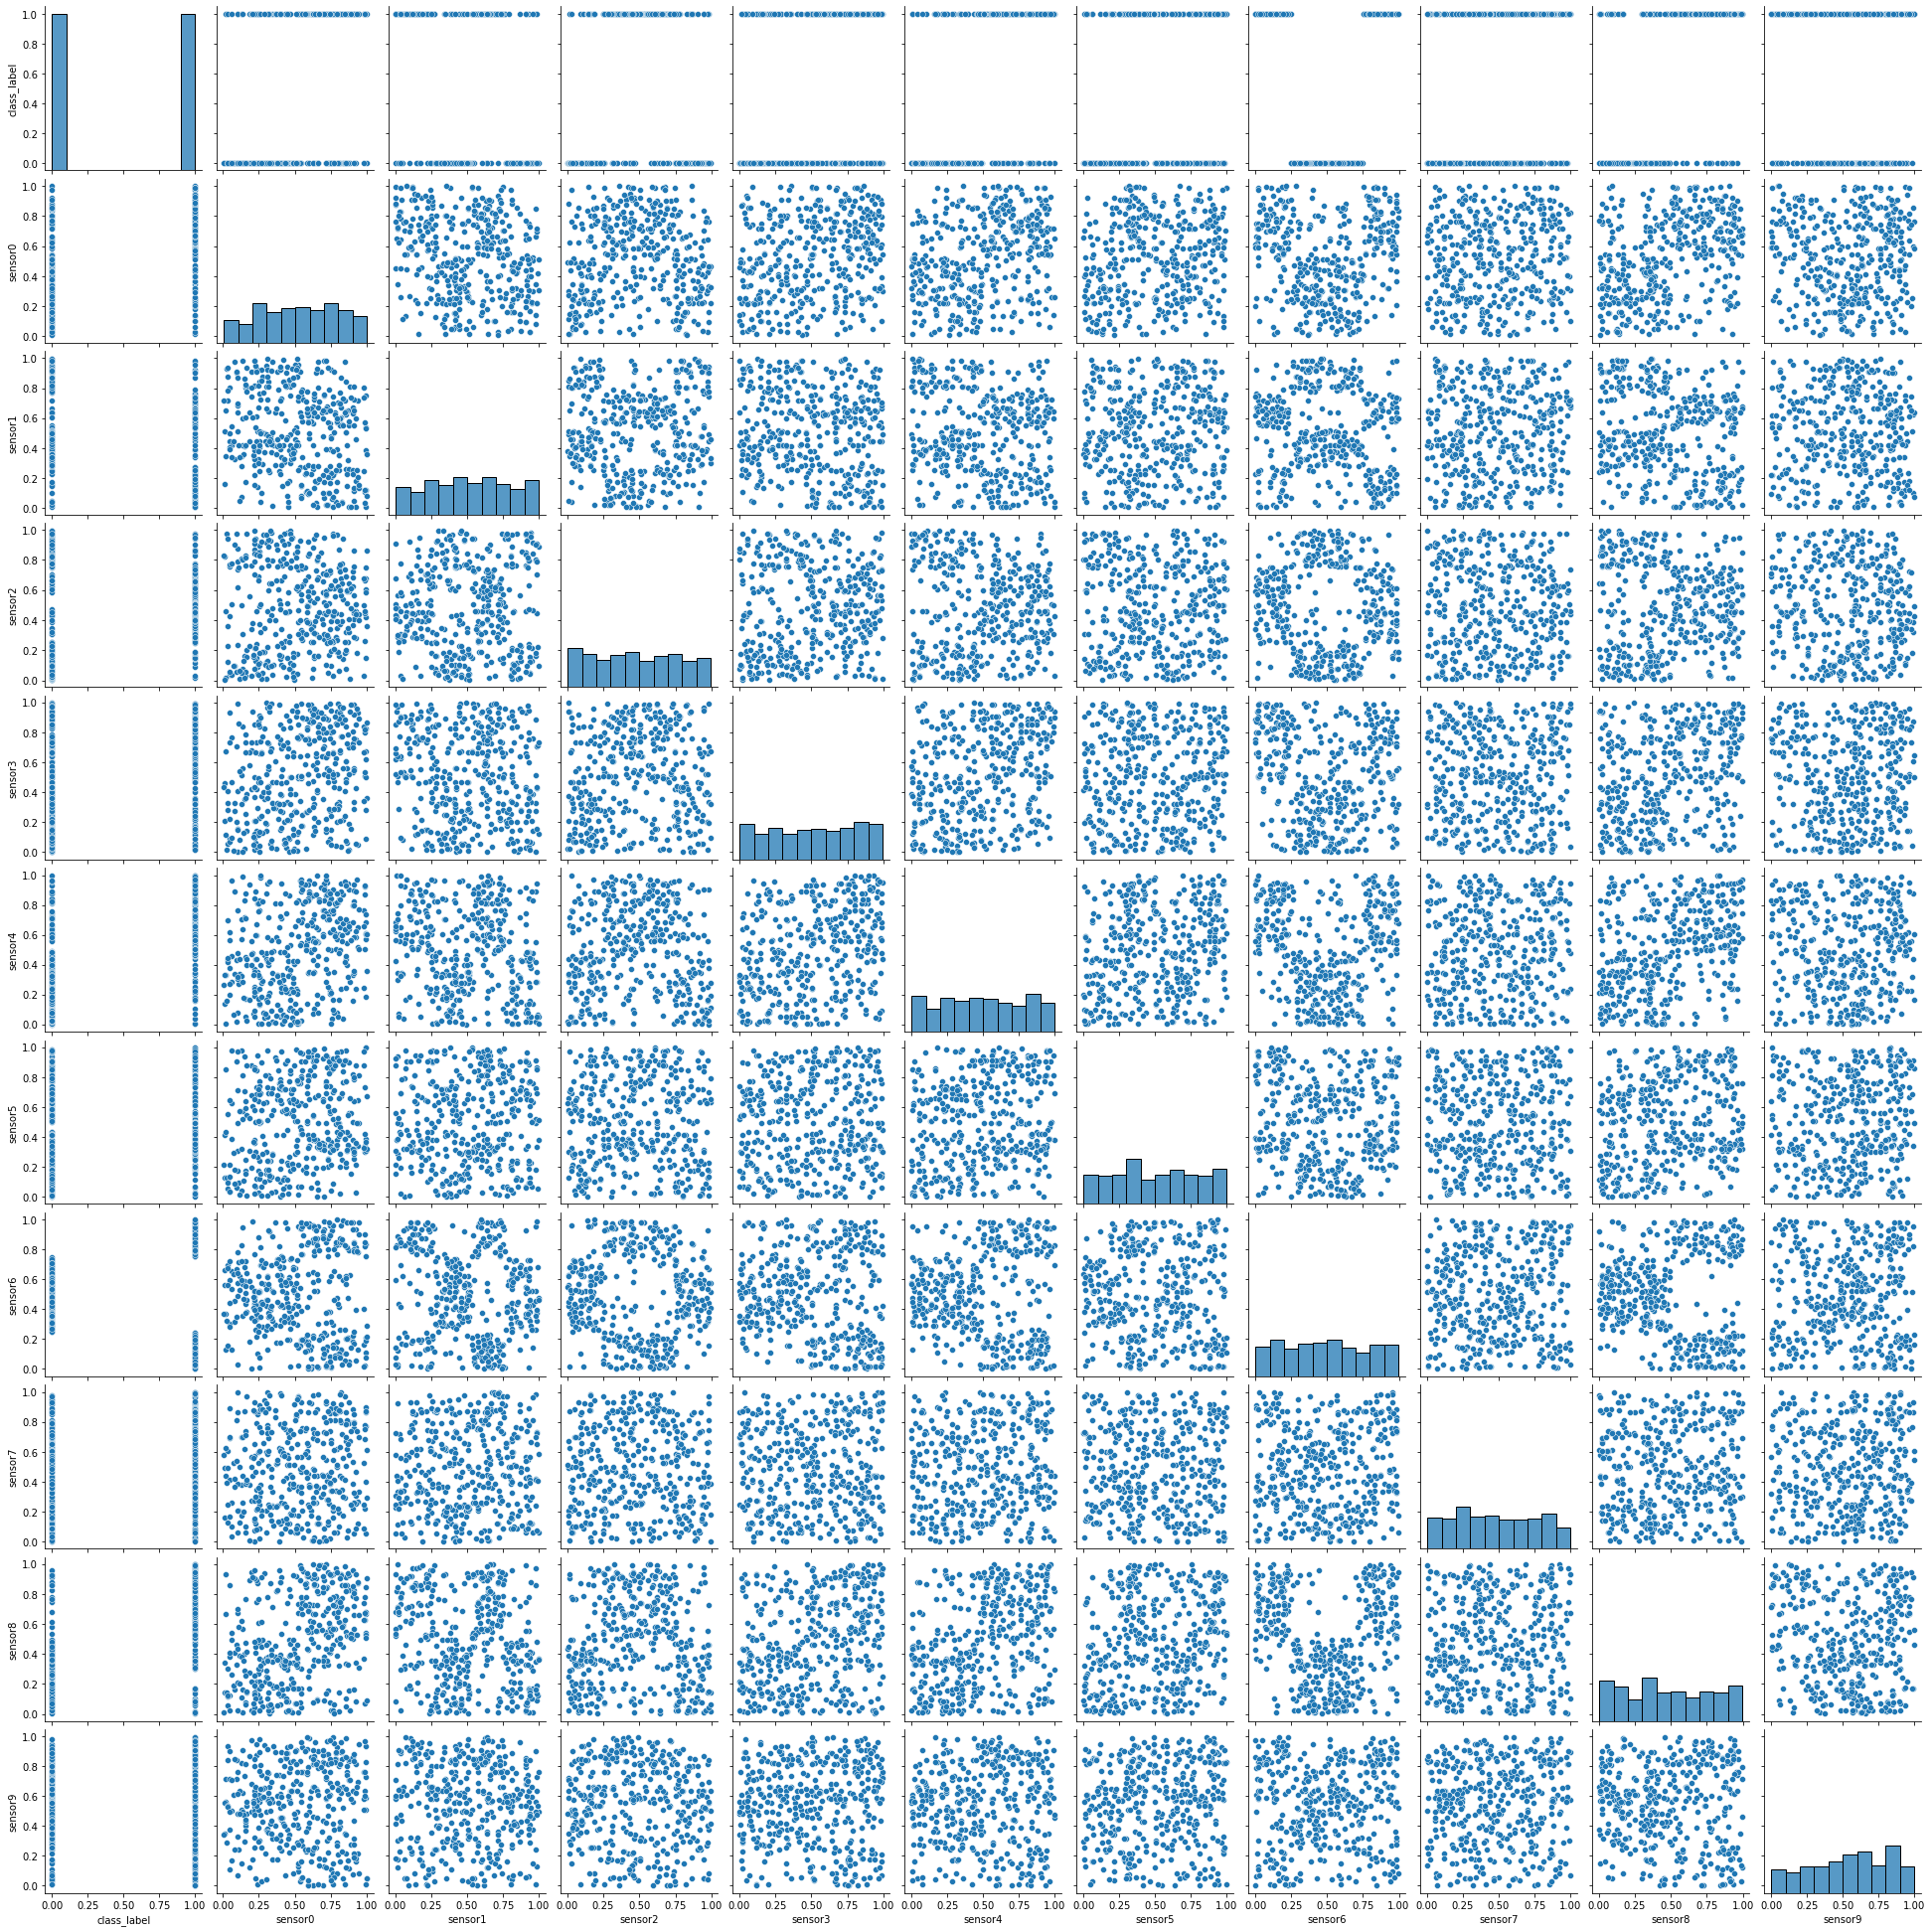

In [15]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'class_label'}>,
        <AxesSubplot:title={'center':'sensor0'}>,
        <AxesSubplot:title={'center':'sensor1'}>],
       [<AxesSubplot:title={'center':'sensor2'}>,
        <AxesSubplot:title={'center':'sensor3'}>,
        <AxesSubplot:title={'center':'sensor4'}>],
       [<AxesSubplot:title={'center':'sensor5'}>,
        <AxesSubplot:title={'center':'sensor6'}>,
        <AxesSubplot:title={'center':'sensor7'}>],
       [<AxesSubplot:title={'center':'sensor8'}>,
        <AxesSubplot:title={'center':'sensor9'}>, <AxesSubplot:>]],
      dtype=object)

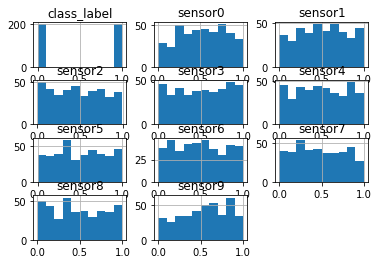

In [16]:
df.hist()

In [17]:
#Check Correlations
df[["sensor8","class_label"]].corr()

,sensor8,class_label
sensor8,1.000000,0.660618
class_label,0.660618,1.000000


In [18]:
#Check Correlations among features
df.corr()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
class_label,1.000000,0.543295,-0.252007,0.038775,0.433636,0.607623,0.224147,-0.007414,0.175612,0.660618,0.094907
sensor0,0.543295,1.000000,-0.215668,0.019521,0.253244,0.300760,0.164243,-0.007849,0.080306,0.361751,0.001317
sensor1,-0.252007,-0.215668,1.000000,0.056042,-0.111347,-0.130463,0.055401,-0.106082,0.031513,-0.163818,-0.023655
sensor2,0.038775,0.019521,0.056042,1.000000,0.093447,-0.023486,-0.008948,-0.057090,0.006899,-0.008308,-0.058528
sensor3,0.433636,0.253244,-0.111347,0.093447,1.000000,0.295136,0.038152,-0.105005,0.001243,0.287776,0.013732
sensor4,0.607623,0.300760,-0.130463,-0.023486,0.295136,1.000000,0.183916,-0.022690,0.090186,0.378306,0.023776
sensor5,0.224147,0.164243,0.055401,-0.008948,0.038152,0.183916,1.000000,-0.061238,0.020814,0.220014,0.071258
sensor6,-0.007414,-0.007849,-0.106082,-0.057090,-0.105005,-0.022690,-0.061238,1.000000,0.065211,-0.073309,0.040744
sensor7,0.175612,0.080306,0.031513,0.006899,0.001243,0.090186,0.020814,0.065211,1.000000,0.060028,0.059341
sensor8,0.660618,0.361751,-0.163818,-0.008308,0.287776,0.378306,0.220014,-0.073309,0.060028,1.000000,-0.033991


<AxesSubplot:>

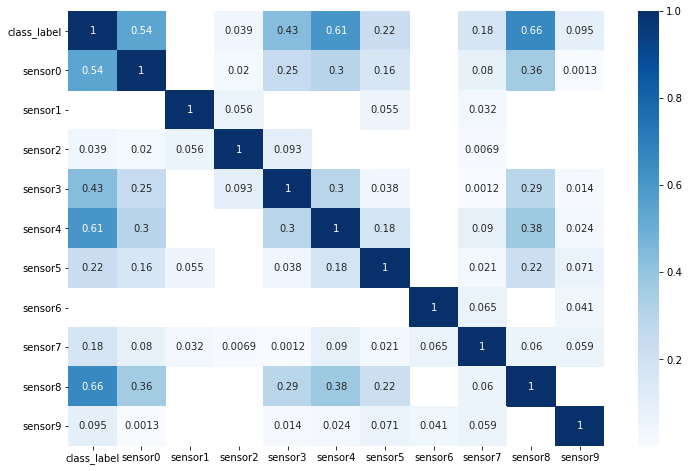

In [19]:
corr = df.corr()

kot = corr[corr >= 0]
plt.figure(figsize = (12,8))
sns.heatmap(kot, cmap="Blues", annot = True)

In [20]:
#Check repetitions in entries
df["class_label"].value_counts()

0    200
1    200
Name: class_label, dtype: int64

In [21]:
# Relevant features
features = ['class_label', 'sensor0', 'sensor1', 'sensor2', 'sensor3', 
    'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9']

In [22]:
df[features].head()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,1,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,1,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,1,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,1,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,1,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


In [23]:
#I choose predictable feature to be failure
#I devide features x and variable y

x = df[features].drop("class_label", axis=1)
y = df[features]["class_label"]

In [24]:
x.head(), y.head()

(    sensor0   sensor1   sensor2   sensor3   sensor4   sensor5   sensor6  \
 0  0.834251  0.726081  0.535904  0.214896  0.873788  0.767605  0.111308   
 1  0.804059  0.253135  0.869867  0.334285  0.604075  0.494045  0.833575   
 2  0.694404  0.595777  0.581294  0.799003  0.762857  0.651393  0.075905   
 3  0.783690  0.038780  0.285043  0.627305  0.800620  0.486340  0.827723   
 4  0.788835  0.174433  0.348770  0.938244  0.692065  0.377620  0.183760   
 
     sensor7   sensor8   sensor9  
 0  0.557526  0.599650  0.665569  
 1  0.194190  0.014966  0.802918  
 2  0.007186  0.659633  0.831009  
 3  0.339807  0.731343  0.892359  
 4  0.616805  0.492899  0.930969  ,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: class_label, dtype: int64)

In [25]:
#I split data for ML training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [26]:
#Feature Selection using Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier() 
rfc.fit(x_train, y_train) 
#yPred = rfc.predict(x_test) 

RandomForestClassifier()

Text(0.5, 0, 'Feature importance using Random Forest Classifier')

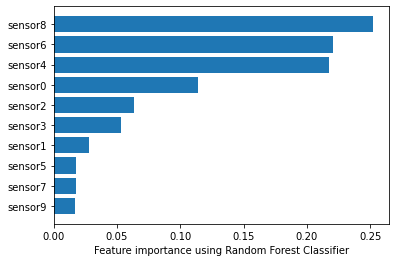

In [27]:
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Feature importance using Random Forest Classifier")

In [28]:
#Permutation Based Feature Importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rfc, x_test, y_test)

Text(0.5, 0, 'Feature importance using permutation')

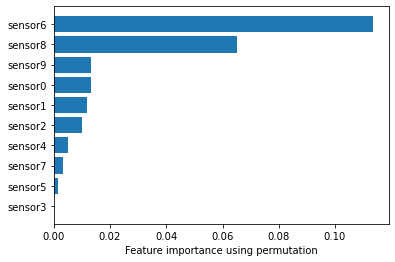

In [29]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(x.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature importance using permutation")

In [30]:
#Feature Importance Computed with SHAP Values
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_test)

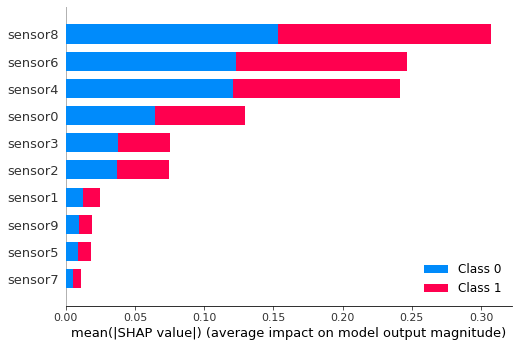

In [31]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

In [32]:
#Xgboost Feature Importance
from xgboost import XGBClassifier

In [33]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

[12:18:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_test)

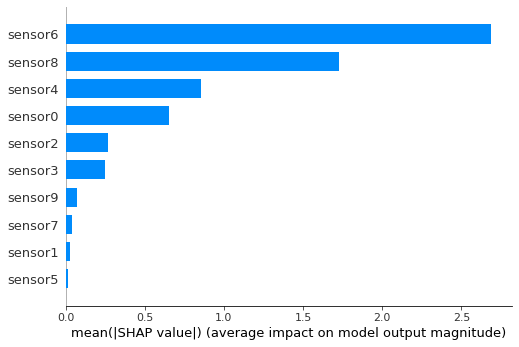

In [35]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

In [36]:
from xgboost import XGBClassifier
from xgboost import plot_importance
model = XGBClassifier()
model.fit(x, y)
print(model.feature_importances_)

[12:18:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.06006592 0.02580708 0.01665015 0.00399834 0.08641388 0.
 0.170378   0.00122901 0.6231604  0.01229715]


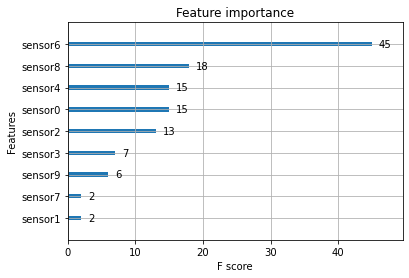

In [37]:
plot_importance(model)
pyplot.show()

Text(0.5, 1.0, 'pvalues with respect to features')

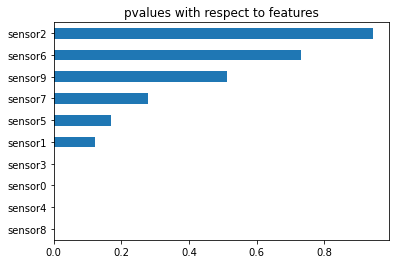

In [38]:
#Feature Selection using Fisher Score and Chi2 (χ2) Test
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score
f_score = chi2(x_train, y_train)
p_values = pd.Series(f_score[1], index = x_train.columns)
p_values.sort_values(ascending = True, inplace = True)
p_values.plot.barh()
plt.title('pvalues with respect to features')

In [39]:
#Saving sorted features
df_imp = pd.DataFrame({'Feature': x.columns, 'Importance': rfc.feature_importances_}) \
    .sort_values('Importance', ascending = False).reset_index(drop = True)

In [40]:
df_imp

,Feature,Importance
0,sensor8,0.251740
1,sensor6,0.220713
2,sensor4,0.217457
3,sensor0,0.113566
4,sensor2,0.063638
5,sensor3,0.053039
6,sensor1,0.027888
7,sensor5,0.017568
8,sensor7,0.017483
9,sensor9,0.016908
